In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 10)]

from random import shuffle

In [7]:
shuffle(colors)

In [65]:
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays
from synthetic_data.trajectory_class import get_rand_traj
from synthetic_data.plotting import plot_trajectory, add_plot_seg_boxes, add_plot_trajectory

from synthetic_data.trajectory_class import get_trajectory
from synthetic_data.trajectory import get_stay

dsec = 1/3600.0
t_total = np.arange(0,24,dsec)

In [48]:
time_thresh = 1/6
dist_thresh=0.25

# Synthetic data: canonical examples

The canonical examples module creates simple trajectories composed ot irreducible features which characterize those features in full trajectories. 
<br/>
The irreducible canonical trajectories are like sub-sections of a full trajectory.
<br/>
The main purpose is to quickly develop and test the algorithms on the canonical trajectories, where the algorithmic faults are more easily exposed.

There are in effect three types of canonical trajectories
1. "1 stay trajectories"
    * there is a single location
    * algorithmic testing is reduced to deciding how well the stay classification works on different temporal densities and noise
2. "2 stay" trajectories
    * two locations (both greater than the minimal length) separated by a travel
    * the testing here aims to evaluate how well the algorithm identifies distinct stays in space
3. "3 stay" trajectories
    * two to three locations (all greater than the minimal length) separated by two travels        
    * the testing here aims to evaluate how well the algorithm identifies distinct stays in space and in time
        * it's always "in space _and_ time": the point here is to ensure that two stays at the same location which are separated by another stay at a different location are identified

In [131]:
time_arr, raw_arr, noise_arr, segments = get_rand_traj(configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

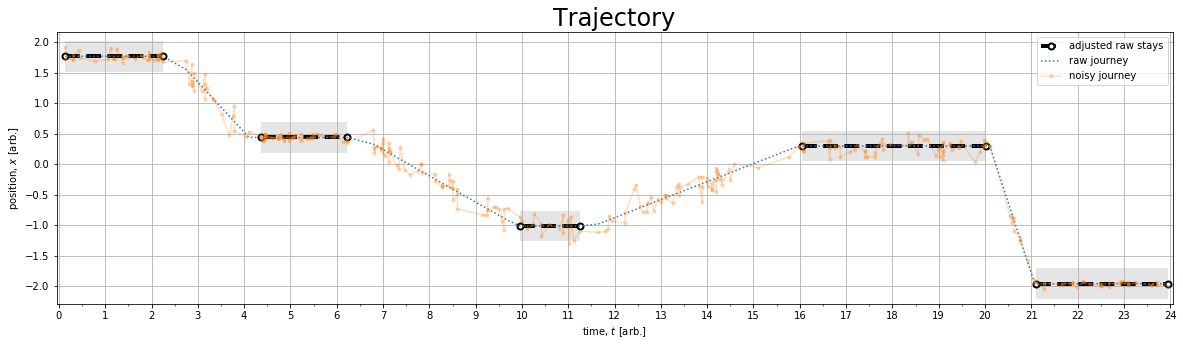

In [133]:
ylim = [noise_arr.min()-d_thresh_plot_buff*dist_thresh, noise_arr.max()+d_thresh_plot_buff*dist_thresh]

ax = plot_trajectory(time_arr, raw_arr, noise_arr, t_segs, x_segs, dist_thresh)
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
ax.set_ylim(ylim);

In [10]:
from synthetic_data.canonical_stays import get1, get2, get3e, get3, get3_core, gen_stays

In [118]:
def get_rand_canonical_stays(configs=None):
    
    if configs == None:
        rand_range = lambda min_, max_, size: (max_-min_)*np.random.random_sample(size=size) + min_

        event_frac = rand_range(0.01,0.001, 1)[0]
        duplicate_frac = 0.30 #rand_range(1,0.3,0.05)[0]

        configs = {
            'time_thresh':1/6,
            'dist_thresh':0.5,
            'event_frac':event_frac,
            'duplicate_frac':duplicate_frac,    
            'noise_min':0.02,
            'noise_max':0.15
        }

    x_dist = rand_range(0.52,5.0, 10)[0]    
    x_dist = (-1)**np.random.randint(0,2,1)*x_dist
    
    mid_len = rand_range(0.2, 8, 10)[0]
    shift = rand_range(-5, 5, 21)[0]
    
    return configs, x_dist, mid_len, shift

In [55]:
d_thresh_plot_buff = 0.5

## Single stays

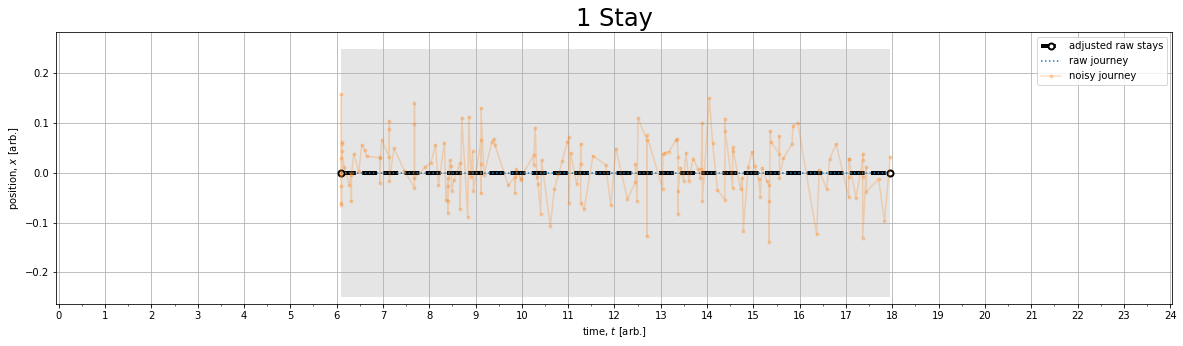

In [57]:
stays = get1()

configs, _, _, _ = get_rand_canonical_stays()

time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]

ax = plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh);
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
ax.set_ylim(ylim)
ax.set_title("1 Stay", fontsize=24);

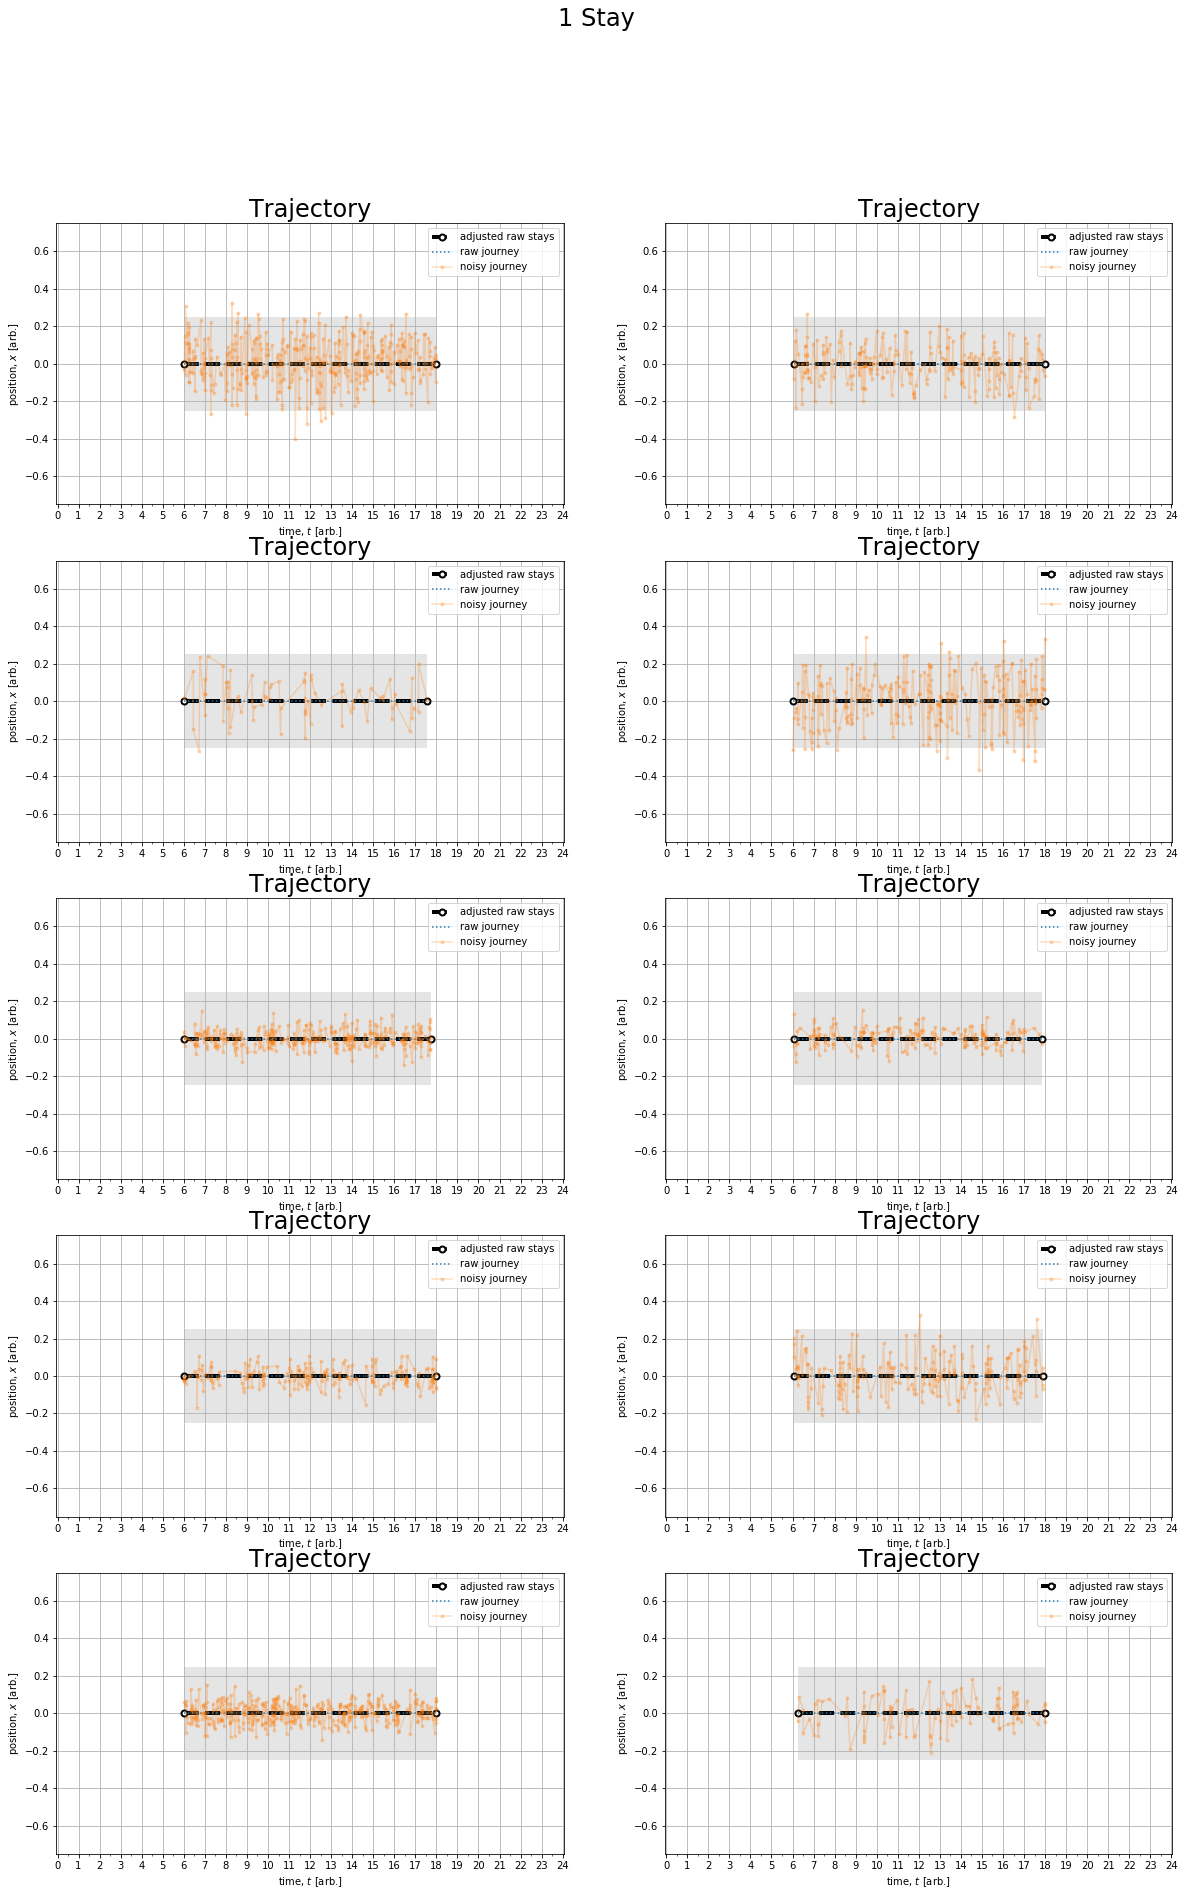

In [121]:
fig, axs = plt.subplots(5,2,figsize=[20,30])
axs = axs.flatten()

ylimit = 0.5

for n in range(10):

    configs, x_dist, mid_len, shift = get_rand_canonical_stays()    
    stays = get1()

    continuation = True
    while continuation:
        nn = 0
        try:
            time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
            t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

            continuation = False
        except:
            print("Failed at", n, nn)
            if nn > 100: 
                continuation = False
            else:
                nn+=1
            pass    

    ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]
    ylim = [-1*ylimit-d_thresh_plot_buff*dist_thresh, ylimit+d_thresh_plot_buff*dist_thresh]
    ax = axs[n];
    
    add_plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
    add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
    ax.set_ylim(ylim)

fig.suptitle("1 Stay", fontsize=24);

## 2 stays

In [59]:
d_thresh_plot_buff = 1.0

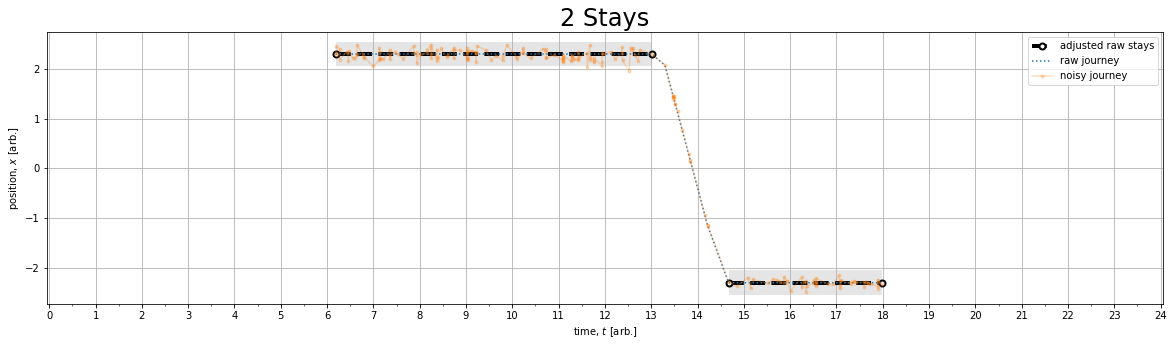

In [102]:
configs, x_dist, _, shift = get_rand_canonical_stays()

stays = get2(shift, x_dist)

time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]

ax = plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh);
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
ax.set_ylim(ylim)
ax.set_title("2 Stays", fontsize=24);

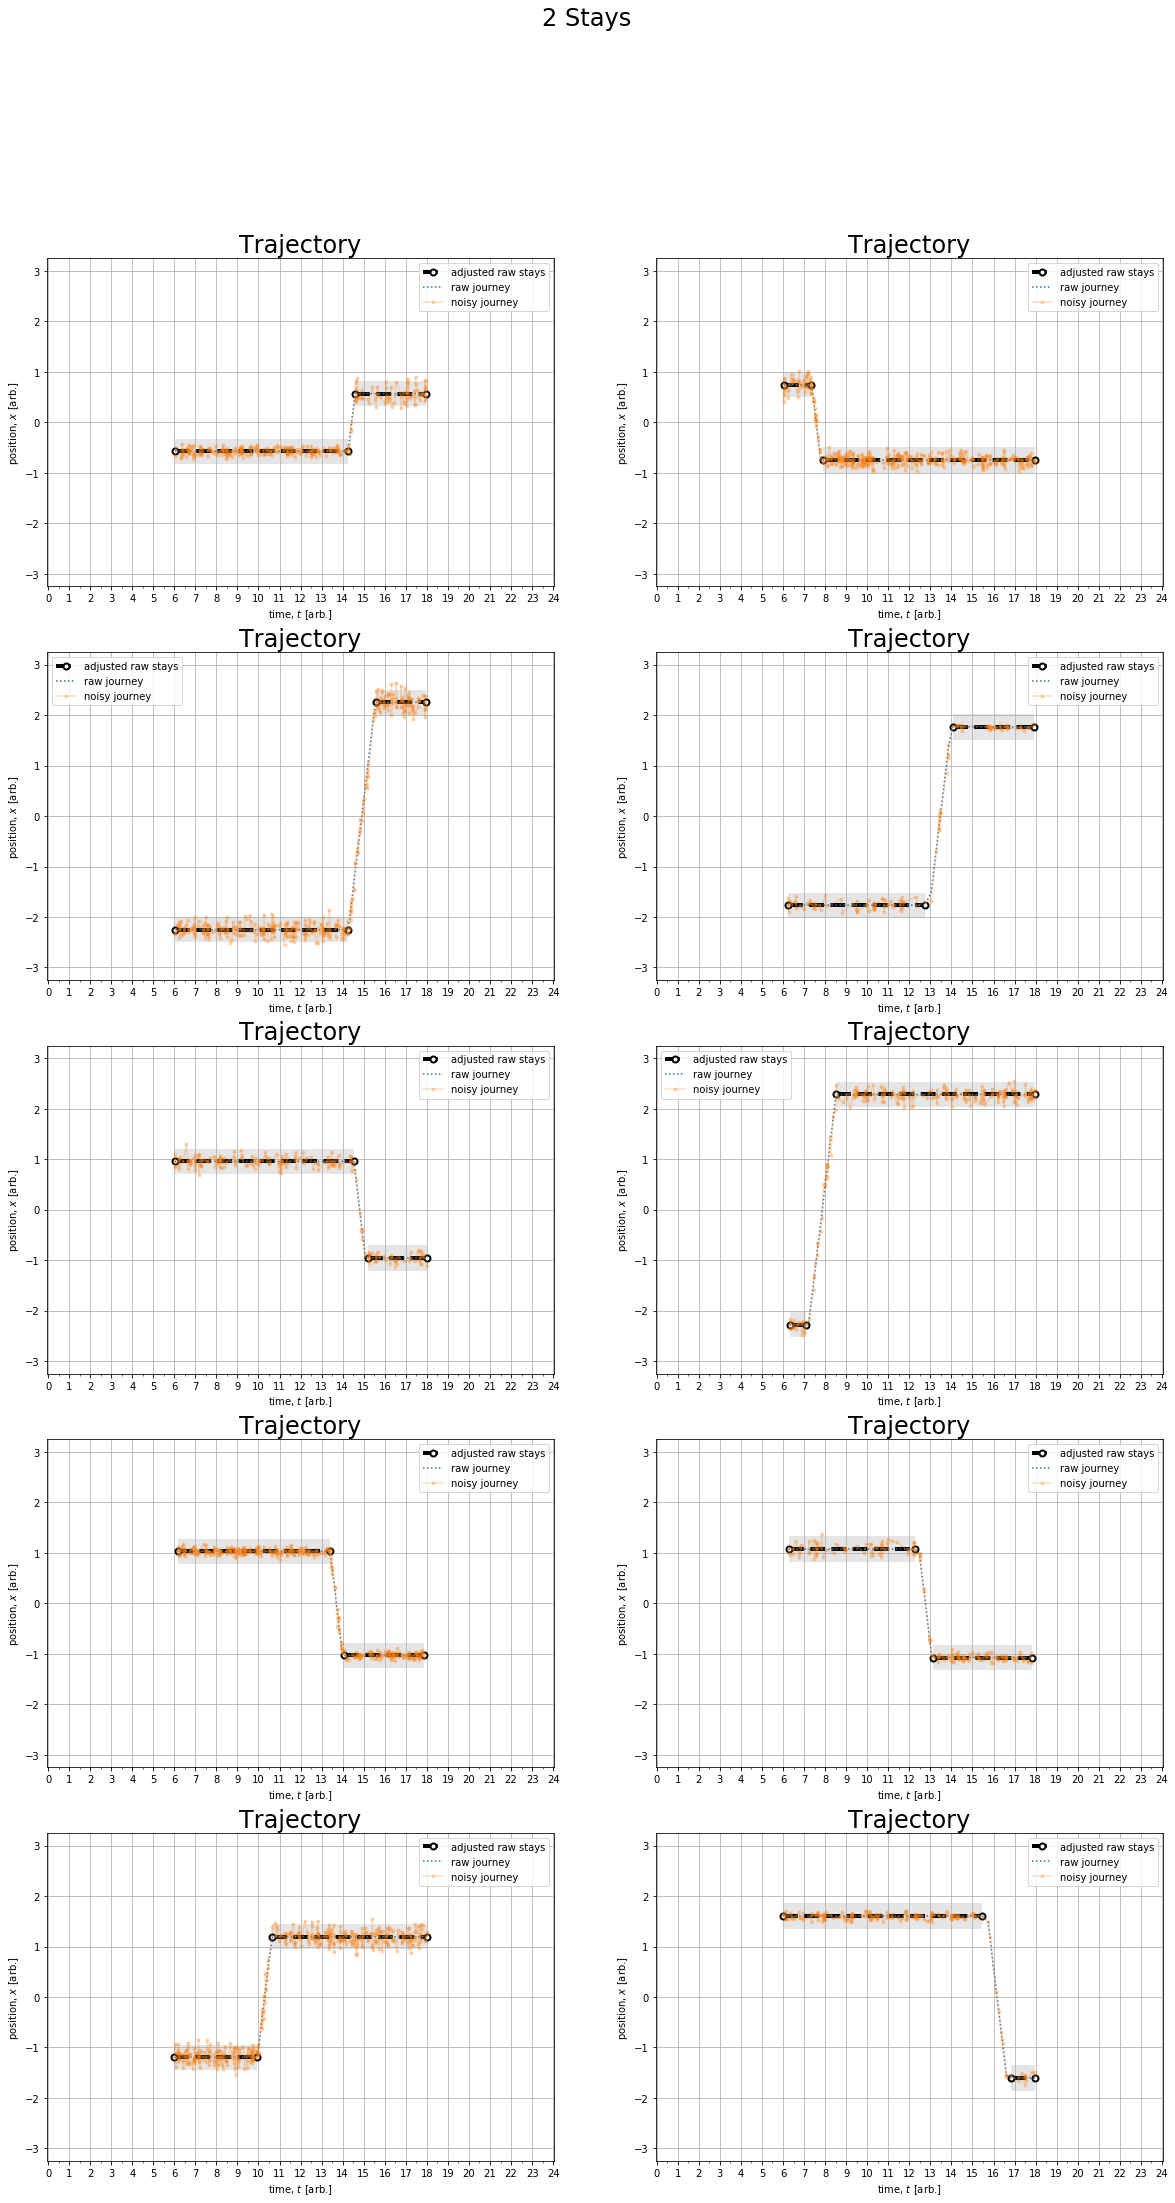

In [124]:
fig, axs = plt.subplots(5,2,figsize=[20,35])
axs = axs.flatten()

ylimit = 3

for n in range(10):

    configs, x_dist, mid_len, shift = get_rand_canonical_stays()    
    stays = get2(x_dist, shift)

    continuation = True
    while continuation:
        nn = 0
        try:
            time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
            t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

            continuation = False
        except:
            print("Failed at", n, nn)
            if nn > 100: 
                continuation = False
            else:
                nn+=1
            pass    

    ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]
    ylim = [-1*ylimit-d_thresh_plot_buff*dist_thresh, ylimit+d_thresh_plot_buff*dist_thresh]
    ax = axs[n];
    
    add_plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
    add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
    ax.set_ylim(ylim)

fig.suptitle("2 Stays", fontsize=24);

## 3 stays

### "return"

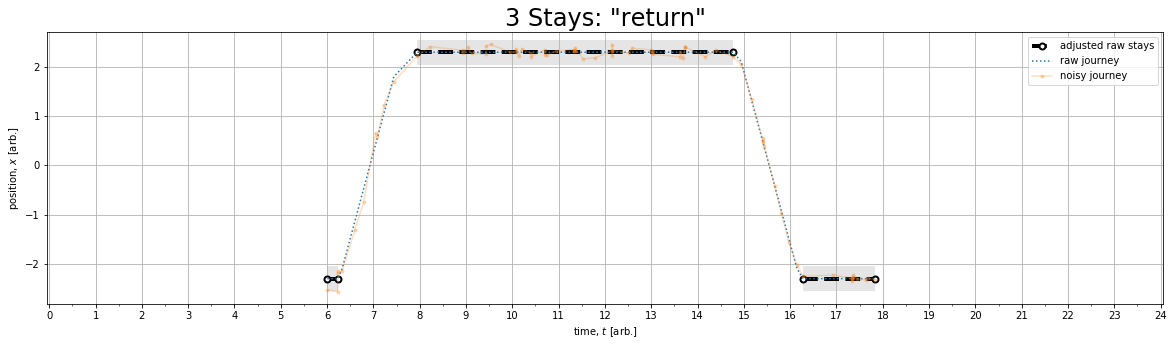

In [105]:
configs, x_dist, mid_len, shift = get_rand_canonical_stays()

stays = get3e(x_dist, mid_len, shift)

time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]

ax = plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh);
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
ax.set_ylim(ylim)
ax.set_title("3 Stays: \"return\"", fontsize=24);

Failed at 4 0
Failed at 4 0
Failed at 8 0


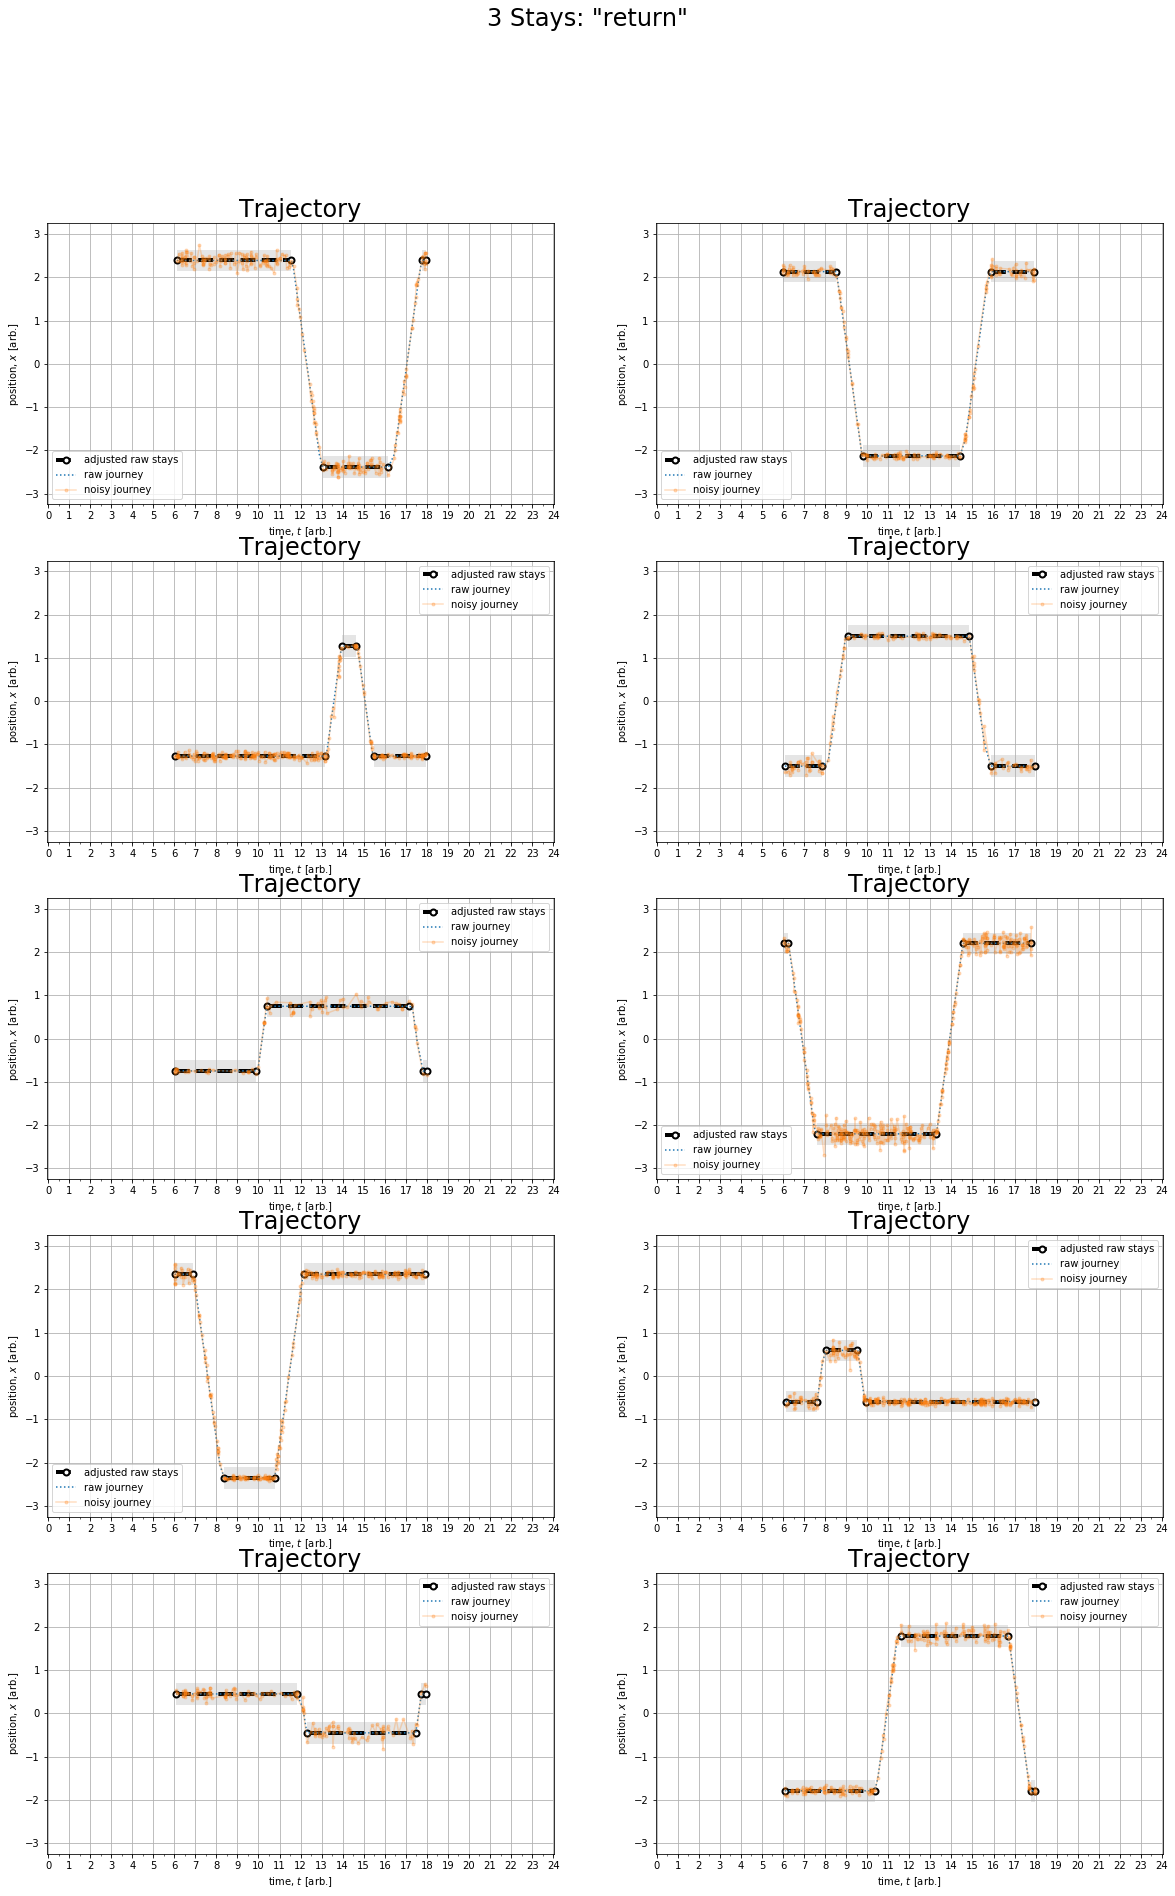

In [114]:
fig, axs = plt.subplots(5,2,figsize=[20,30])
axs = axs.flatten()

ylimit = 3

for n in range(10):

    configs, x_dist, mid_len, shift = get_rand_canonical_stays()    
    stays = get3e(x_dist, mid_len, shift)

    continuation = True
    while continuation:
        nn = 0
        try:
            time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
            t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

            continuation = False
        except:
            print("Failed at", n, nn)
            if nn > 100: 
                continuation = False
            else:
                nn+=1
            pass    

    ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]
    ylim = [-1*ylimit-d_thresh_plot_buff*dist_thresh, ylimit+d_thresh_plot_buff*dist_thresh]
    ax = axs[n];
    
    add_plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
    add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
    ax.set_ylim(ylim)

fig.suptitle("3 Stays: \"return\"", fontsize=24);

### "translated"

In [106]:
configs, x_dist, mid_len, shift = get_rand_canonical_stays()

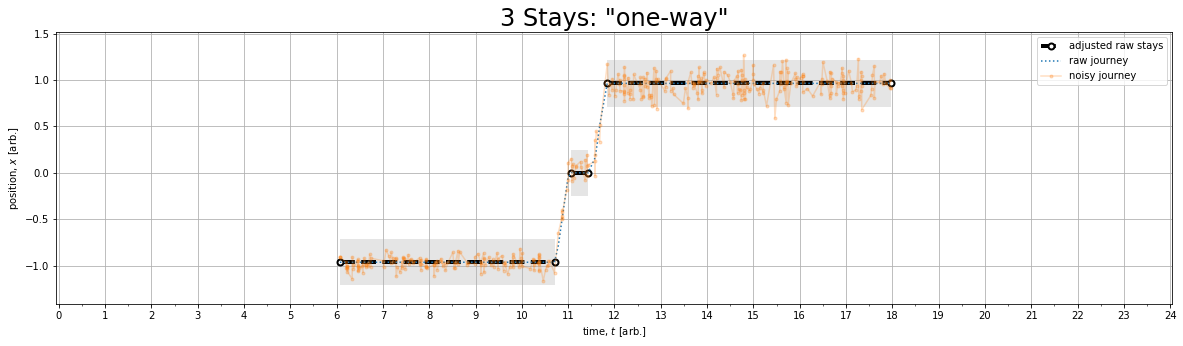

In [107]:
stays = get3(-1*x_dist, mid_len, shift)

time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]

ax = plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh);
add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
ax.set_ylim(ylim)
ax.set_title("3 Stays: \"one-way\"", fontsize=24);

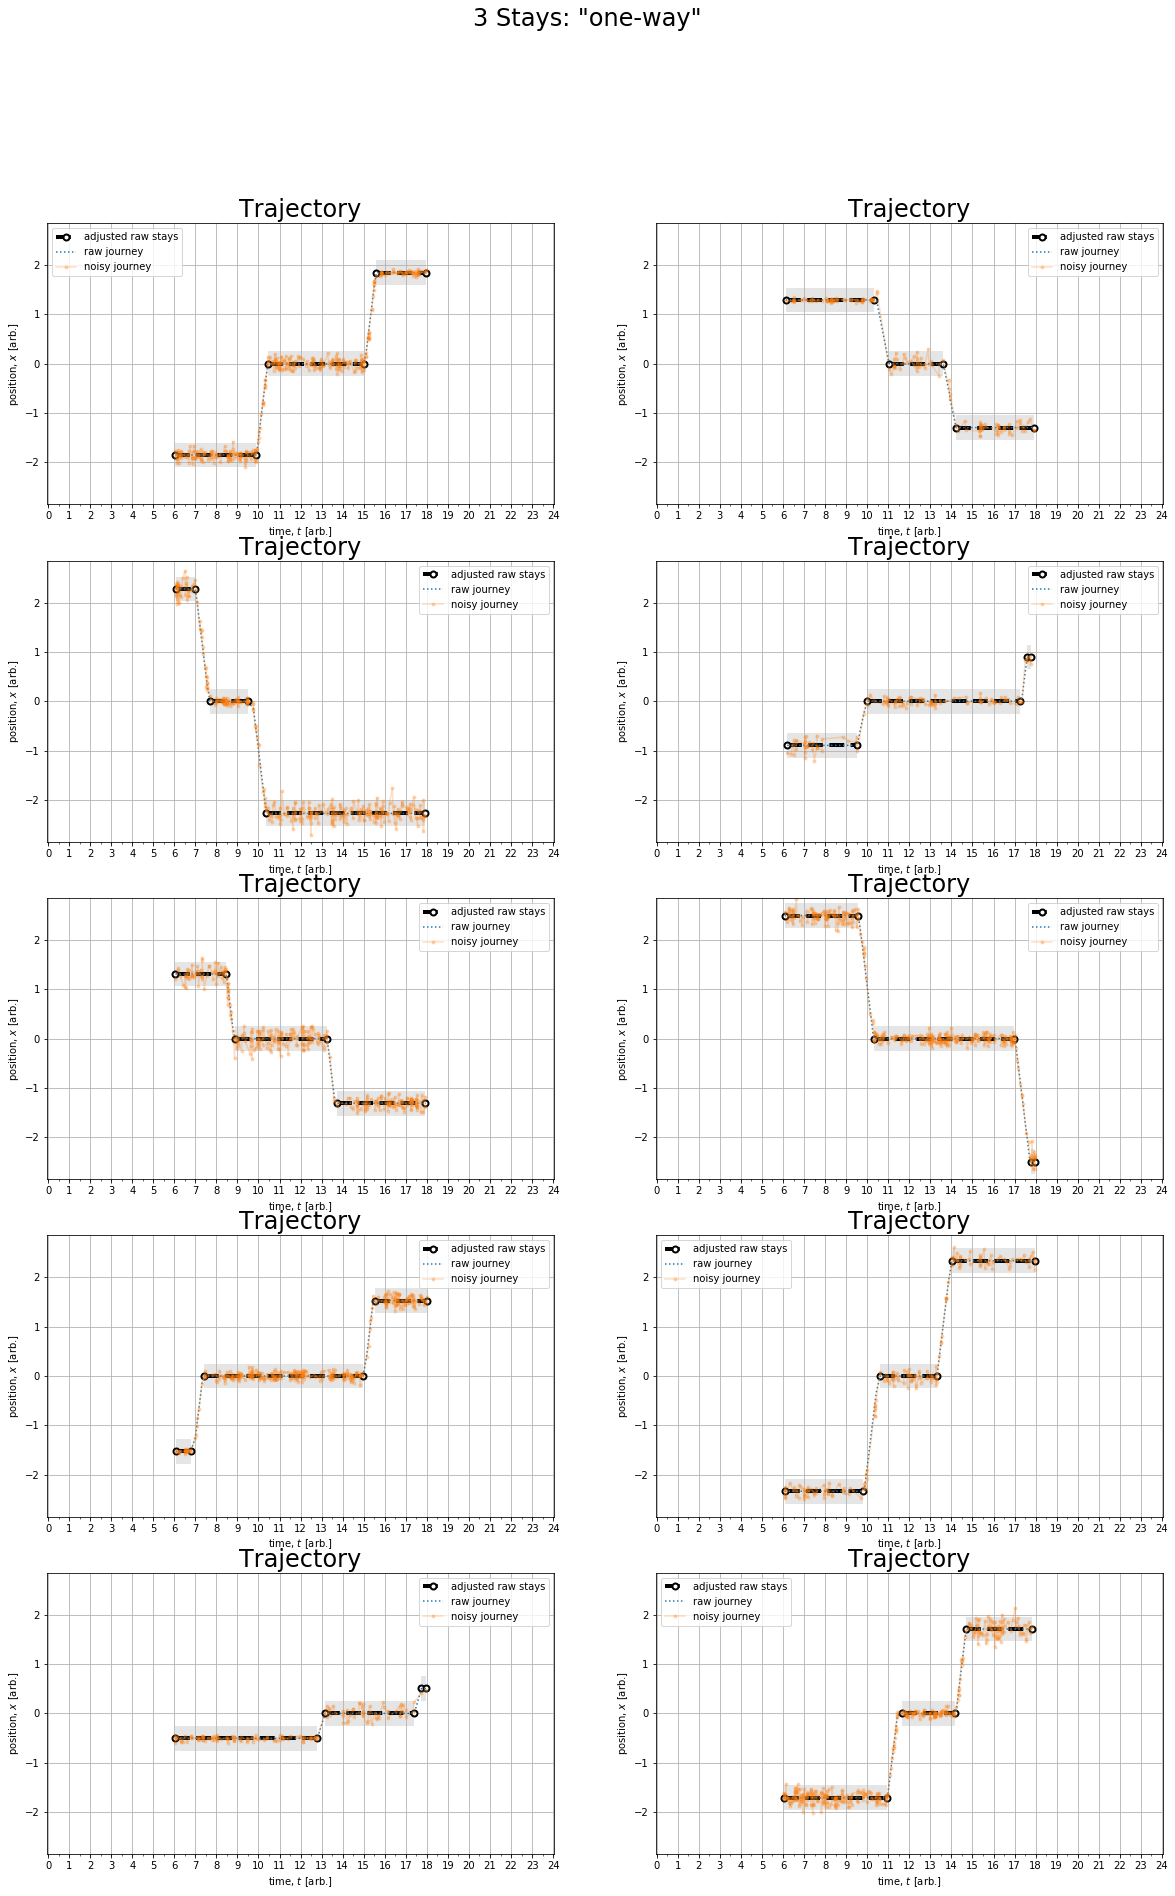

In [116]:
fig, axs = plt.subplots(5,2,figsize=[20,30])
axs = axs.flatten()

ylimit = 2.6

for n in range(10):

    configs, x_dist, mid_len, shift = get_rand_canonical_stays()    
    stays = get3(x_dist, mid_len, shift)

    continuation = True
    while continuation:
        nn = 0
        try:
            time_arr, raw_arr, x_arr, segments = get_trajectory(stays, t_total, configs)
            t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

            continuation = False
        except:
            print("Failed at", n, nn)
            if nn > 100: 
                continuation = False
            else:
                nn+=1
            pass    

    ylim = [x_arr.min()-d_thresh_plot_buff*dist_thresh, x_arr.max()+d_thresh_plot_buff*dist_thresh]
    ylim = [-1*ylimit-d_thresh_plot_buff*dist_thresh, ylimit+d_thresh_plot_buff*dist_thresh]
    ax = axs[n];
    
    add_plot_trajectory(time_arr, raw_arr, x_arr, t_segs, x_segs, dist_thresh, ax)
    add_plot_seg_boxes(t_segs, x_segs, dist_thresh, ax)
    ax.set_ylim(ylim)

fig.suptitle("3 Stays: \"one-way\"", fontsize=24);